<P> <B> <font color=red size="6"> Gradient Boosting Regression </Font></B> </P>

<b>Gradient Boosting Regression is a powerful machine learning algorithm that builds an ensemble of trees in a sequential manner, where each subsequent tree attempts to correct the errors of the previous trees. It’s particularly useful for handling non-linear relationships and can work well on both small and large datasets.<b/>

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [3]:
# Load the wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target + 0.1 * wine.data[:, 0]  # Convert target to continuous for regression

In [4]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<b>A GradientBoostingRegressor is initialized with the following parameters:</b>

    n_estimators=100: Number of trees to be used.
    learning_rate=0.1: Learning rate that controls the contribution of each tree.
    max_depth=3: Maximum depth of each tree.
    random_state=42: Ensures reproducibility.

In [6]:
# Initialize the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


In [7]:
# Fit the model
gbr.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [8]:
# Make predictions
y_pred_test = gbr.predict(X_test_scaled)


In [9]:
# Evaluate the model
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test Set Mean Squared Error: {mse_test:.4f}")
print(f"Test Set R² Score: {r2_test:.4f}")

Test Set Mean Squared Error: 0.1108
Test Set R² Score: 0.7957


<b>Predicted vs. Actual: A scatter plot to show how well the model's predictions align with the actual values.
Residual Plot: A plot to show the differences (errors) between the predicted and actual values.
Feature Importance: A bar plot to show the importance of each feature in the model.<b/>

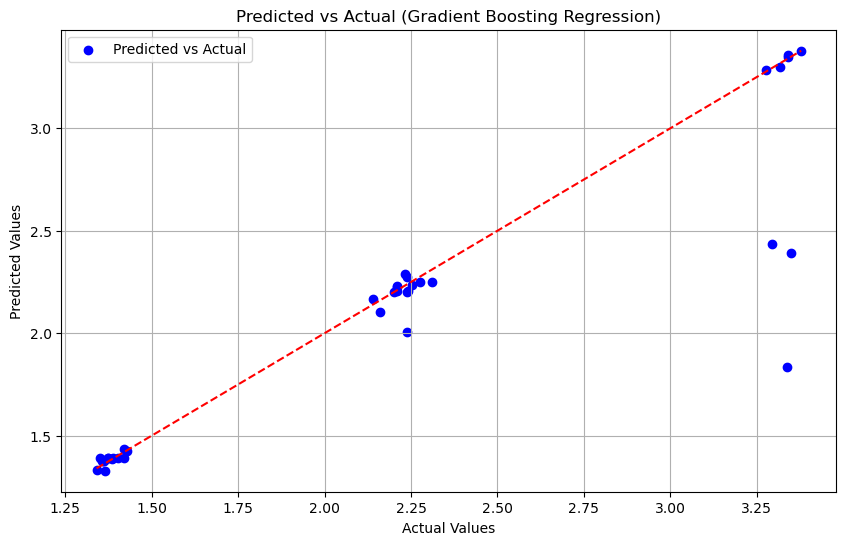

In [11]:
import matplotlib.pyplot as plt
# 1. Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Identity line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual (Gradient Boosting Regression)")
plt.legend()
plt.grid(True)
plt.show()


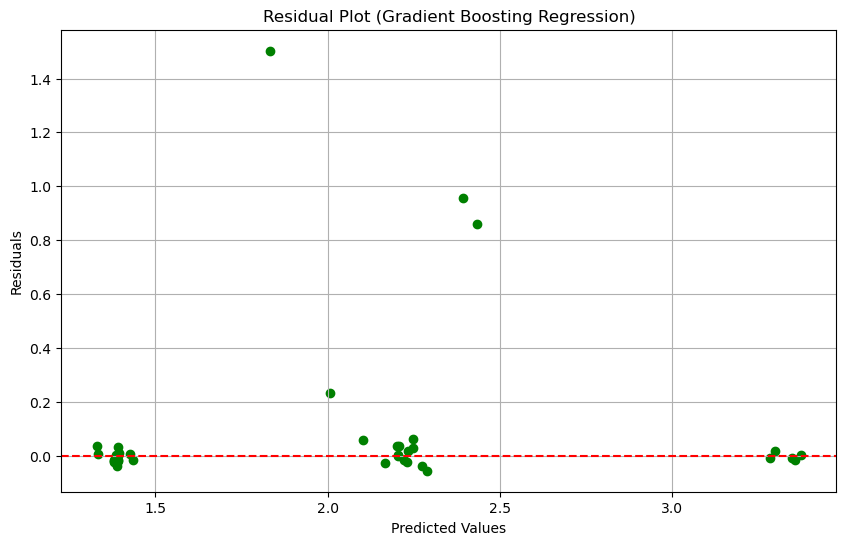

In [12]:
# 2. Residual Plot
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Gradient Boosting Regression)")
plt.grid(True)
plt.show()

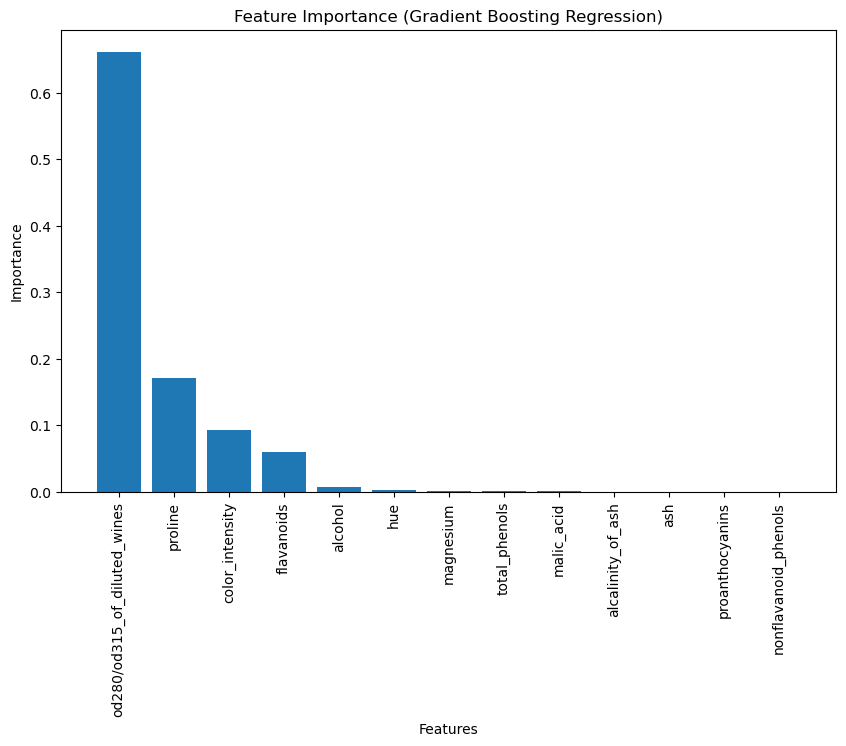

In [14]:
import numpy as np
# 3. Feature Importances (Bar plot)
importances = gbr.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort by importance

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.title("Feature Importance (Gradient Boosting Regression)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


<b>Advantages of Gradient Boosting Regression:</b>
<Ol>
    <li>Handling Complex Data: It is great at modeling complex, non-linear relationships.</li>
    <li>Feature Importance: It can help identify important features in the data.</li>
    <li>Robust to Outliers: Gradient Boosting can handle outliers better than some other models.</li></ol>